# Training CNN for the Movement Recognition task, execution trials

In this notebook, we train CNNs on the movement recognition when the subject executes the task, using PyTorch.

### Import librairies

In [1]:
from utils import *
from dataset import *
from constants import *

import os
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

from dataset import Participant
from models.DeepModels import *
from models.DeepUtils import *

# Reproducibility
seed_num = RANDOM_STATE # This seed will be used for all random number generators
torch.use_deterministic_algorithms(True) # PyTorch will use deterministic algorithms fro operations with stochastic behavior like dropout
random.seed(seed_num) # Python's random will use seed_num
np.random.seed(seed_num) # NumPy's random number generator will use seed_num
torch.manual_seed(seed_num) # PyTorch's random number will use seed_num

### Data loading

Change here the participant to load.

In [2]:
use_saved = True
part_name = 's6'

In [3]:
if use_saved:
    participant = Participant.load_from_pickle(f'saved/{part_name}.pkl')
else:
    participant = Participant(part_name, data_path=DATA_PATH_NOTEBOOK, alpha=0.05)
    saved_dir = os.path.join(os.getcwd(), 'saved')
    if not os.path.exists(saved_dir):
        os.makedirs(saved_dir)
    with open(f'saved/{part_name}.pkl', 'wb') as f:
        pickle.dump(participant, f, pickle.HIGHEST_PROTOCOL)

## 2D convolutional network

The 2D convolutional network treats the signals' timepoints as pixels of an image.

In [4]:
channels = participant.relevant_channels_ex
channels_id = [channel.idx for channel in channels]
sessions = participant.sessions
signals = []
labels = []
for session in sessions:
    for trial in session.trials:
        if trial.action_type == 'E':
            signals.append([trial.get_signal()[channels_id, :]])
            labels.append(1 if trial.object_size == 'S' else 0)
        
signals = torch.Tensor(np.array(signals))
labels = torch.Tensor(labels).long()
print(signals.shape)

torch.Size([128, 1, 40, 1500])


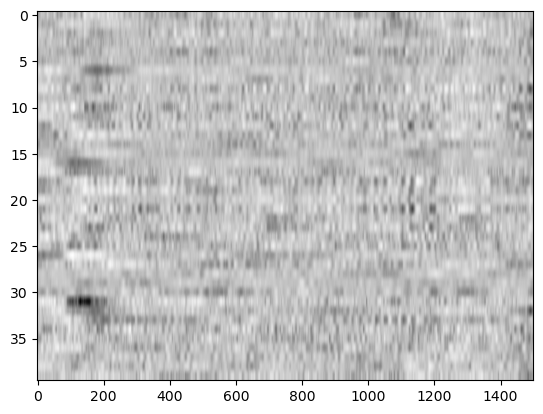

In [5]:
plt.imshow(signals[0][0], cmap='Greys', aspect='auto')

### Dataset preparation

In [6]:
signal_dataset = TensorDataset(signals, labels)
train_set, val_set = torch.utils.data.random_split(signal_dataset, [int(0.8 * len(signal_dataset)), len(signal_dataset) - int(0.8 * len(signal_dataset))])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

### Model preparation

In [7]:
model = CNN2D(signals.shape[1], 2, height=signals.shape[2],
    width=signals.shape[3], channels=(2, 4), paddings=(1, 1),
    strides=(10, 10), convkernels=(5, 2), maxpoolkernels=(2, 1))
trainer = Trainer(model, 0.001, 10)

Finally, train the model:

In [8]:
trainer.train(train_loader, val_loader)

Epoch 1/10 - Training:   0%|          | 0/26 [00:00<?, ?it/s]

Epoch 1/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 105.24it/s]


Epoch: 1 	Training Loss: 0.690631 	Training Acc: 0.509804


Epoch 1/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 696.20it/s]


Epoch: 1 	Validation Loss: 0.704891 	Validation Acc: 0.423077
Validation loss decreased (inf --> 0.704891). Saving model ...


Epoch 2/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 197.85it/s]


Epoch: 2 	Training Loss: 0.645273 	Training Acc: 0.676471


Epoch 2/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 697.01it/s]


Epoch: 2 	Validation Loss: 0.703909 	Validation Acc: 0.384615
Validation loss decreased (0.704891 --> 0.703909). Saving model ...


Epoch 3/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 213.77it/s]


Epoch: 3 	Training Loss: 0.631454 	Training Acc: 0.676471


Epoch 3/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 696.99it/s]


Epoch: 3 	Validation Loss: 0.697917 	Validation Acc: 0.538462
Validation loss decreased (0.703909 --> 0.697917). Saving model ...


Epoch 4/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 213.91it/s]


Epoch: 4 	Training Loss: 0.585014 	Training Acc: 0.715686


Epoch 4/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 697.56it/s]


Epoch: 4 	Validation Loss: 0.686706 	Validation Acc: 0.576923
Validation loss decreased (0.697917 --> 0.686706). Saving model ...


Epoch 5/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 215.24it/s]


Epoch: 5 	Training Loss: 0.543379 	Training Acc: 0.764706


Epoch 5/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 3433.53it/s]


Epoch: 5 	Validation Loss: 0.662268 	Validation Acc: 0.653846
Validation loss decreased (0.686706 --> 0.662268). Saving model ...


Epoch 6/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 198.44it/s]


Epoch: 6 	Training Loss: 0.505346 	Training Acc: 0.754902


Epoch 6/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 696.71it/s]


Epoch: 6 	Validation Loss: 0.645810 	Validation Acc: 0.653846
Validation loss decreased (0.662268 --> 0.645810). Saving model ...


Epoch 7/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 211.69it/s]


Epoch: 7 	Training Loss: 0.448483 	Training Acc: 0.823529


Epoch 7/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 695.82it/s]


Epoch: 7 	Validation Loss: 0.666001 	Validation Acc: 0.653846


Epoch 8/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 186.89it/s]


Epoch: 8 	Training Loss: 0.389753 	Training Acc: 0.843137


Epoch 8/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 696.60it/s]


Epoch: 8 	Validation Loss: 0.657963 	Validation Acc: 0.576923


Epoch 9/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 183.91it/s]


Epoch: 9 	Training Loss: 0.342488 	Training Acc: 0.892157


Epoch 9/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 697.26it/s]


Epoch: 9 	Validation Loss: 0.689857 	Validation Acc: 0.538462


Epoch 10/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 200.80it/s]


Epoch: 10 	Training Loss: 0.294852 	Training Acc: 0.901961


Epoch 10/10 - Validation: 100%|██████████| 7/7 [00:00<?, ?it/s]

Epoch: 10 	Validation Loss: 0.721443 	Validation Acc: 0.576923


## 1D convolutional network

1D convolutional network treats the signal as it is, that is, a timeserie.

In [9]:
channels = participant.relevant_channels_both
channels_id = [channel.idx for channel in channels]
sessions = participant.sessions
signals = []
labels = []
for session in sessions:
    for trial in session.trials:
        if trial.action_type == 'E':
            signals.append(trial.get_signal()[channels_id, :])
            labels.append(1 if trial.object_size == 'S' else 0)
        
signals = torch.Tensor(np.array(signals))
labels = torch.Tensor(labels).long()
print(signals.shape)

torch.Size([128, 40, 1500])


### Dataset preparation

In [10]:
signal_dataset = TensorDataset(signals, labels)
train_set, val_set = torch.utils.data.random_split(signal_dataset, [int(0.8 * len(signal_dataset)), len(signal_dataset) - int(0.8 * len(signal_dataset))])
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=4, shuffle=False)

### Model preparation

In [11]:
model = CNN1D(signals.shape[1], 2, length=signals.shape[2],
    channels=(8, 16), paddings=(1, 1), strides=(5, 5), convkernels=(10, 50), maxpoolkernels=(2, 2))
trainer = Trainer(model, 0.001, 10)

Finally, train the model:

In [12]:
trainer.train(train_loader, val_loader)

Epoch 1/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 202.06it/s]


Epoch: 1 	Training Loss: 0.681840 	Training Acc: 0.588235


Epoch 1/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 252.83it/s]


Epoch: 1 	Validation Loss: 0.644691 	Validation Acc: 0.807692
Validation loss decreased (inf --> 0.644691). Saving model ...


Epoch 2/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 214.55it/s]


Epoch: 2 	Training Loss: 0.468254 	Training Acc: 0.852941


Epoch 2/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 696.33it/s]


Epoch: 2 	Validation Loss: 0.447325 	Validation Acc: 0.961538
Validation loss decreased (0.644691 --> 0.447325). Saving model ...


Epoch 3/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 217.80it/s]


Epoch: 3 	Training Loss: 0.179392 	Training Acc: 0.950980


Epoch 3/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 387.46it/s]


Epoch: 3 	Validation Loss: 0.161531 	Validation Acc: 1.000000
Validation loss decreased (0.447325 --> 0.161531). Saving model ...


Epoch 4/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 229.63it/s]


Epoch: 4 	Training Loss: 0.050923 	Training Acc: 0.990196


Epoch 4/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 693.65it/s]


Epoch: 4 	Validation Loss: 0.160795 	Validation Acc: 0.961538
Validation loss decreased (0.161531 --> 0.160795). Saving model ...


Epoch 5/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 212.20it/s]


Epoch: 5 	Training Loss: 0.017192 	Training Acc: 1.000000


Epoch 5/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 386.92it/s]


Epoch: 5 	Validation Loss: 0.435202 	Validation Acc: 0.769231


Epoch 6/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 215.66it/s]


Epoch: 6 	Training Loss: 0.013375 	Training Acc: 0.990196


Epoch 6/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 696.17it/s]


Epoch: 6 	Validation Loss: 0.055115 	Validation Acc: 0.961538
Validation loss decreased (0.160795 --> 0.055115). Saving model ...


Epoch 7/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 244.64it/s]


Epoch: 7 	Training Loss: 0.011211 	Training Acc: 1.000000


Epoch 7/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 696.83it/s]


Epoch: 7 	Validation Loss: 0.184547 	Validation Acc: 0.884615


Epoch 8/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 79.53it/s]


Epoch: 8 	Training Loss: 0.002551 	Training Acc: 1.000000


Epoch 8/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 62.88it/s]


Epoch: 8 	Validation Loss: 0.207417 	Validation Acc: 0.884615


Epoch 9/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 152.02it/s]


Epoch: 9 	Training Loss: 0.000853 	Training Acc: 1.000000


Epoch 9/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 696.66it/s]


Epoch: 9 	Validation Loss: 0.204117 	Validation Acc: 0.884615


Epoch 10/10 - Training: 100%|██████████| 26/26 [00:00<00:00, 112.16it/s]


Epoch: 10 	Training Loss: 0.000905 	Training Acc: 1.000000


Epoch 10/10 - Validation: 100%|██████████| 7/7 [00:00<00:00, 348.22it/s]

Epoch: 10 	Validation Loss: 0.177638 	Validation Acc: 0.923077
